In [67]:
# Initial Imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plot
import seaborn as sns
from ipywidgets import interact

import riskfolio as rp
from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("dark", "dark", "dark")

from datetime import date
from datetime import timedelta

In [72]:
# Setting-up the dataframes
my_df = Path('../Resources/portfolio_eli.csv')
omar_df = Path('../Resources/portfolio_omar.csv')
eamonn_df = Path('../Resources/portfolio_eamonn.csv')
mike_df = Path('../Resources/portfolio_mike.csv')

# Clean the data
my_portfolio = pd.read_csv(my_df, index_col='Stock')
my_portfolio['Weight'] = my_portfolio['Weight'].str.replace('%','').astype('float') / 100

omar_portfolio = pd.read_csv(omar_df, index_col='Stock')
omar_portfolio['Weight'] = omar_portfolio['Weight'].str.replace('%','').astype('float') / 100

eamonn_portfolio = pd.read_csv(eamonn_df, index_col='Stock')
eamonn_portfolio['PortFolio Weight'] = eamonn_portfolio['PortFolio Weight'].str.replace('%','').astype('float') / 100

mike_portfolio = pd.read_csv(mike_df)
mike_portfolio['WEIGHT'] = mike_portfolio['WEIGHT'].astype('float')

# Adding the data into lists
my_stock_tickers = my_portfolio['Ticker'].tolist()
my_stock_weights = my_portfolio['Weight'].tolist()

omar_stock_tickers = omar_portfolio['Ticker'].tolist()
omar_stock_weights = omar_portfolio['Weight'].tolist()

eamonn_stock_tickers = eamonn_portfolio['Ticker'].tolist()
eamonn_stock_weights = eamonn_portfolio['PortFolio Weight'].tolist()

mike_stock_tickers = mike_portfolio['STOCK'].tolist()
mike_stock_weights = mike_portfolio['WEIGHT'].tolist()

In [74]:
# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2013,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f"There are {len(my_stock_tickers)} individual stocks in Eli's portfolio")
print(f"There are {len(omar_stock_tickers)} individual stocks in Omar's portfolio")
print(f"There are {len(eamonn_stock_tickers)} individual stocks in Eamonn's portfolio")
print(f"There are {len(mike_stock_tickers)} individual stocks in Mike's portfolio")

2023-02-20
There are 6 individual stocks in Eli's portfolio
There are 33 individual stocks in Omar's portfolio
There are 35 individual stocks in Eamonn's portfolio
There are 35 individual stocks in Mike's portfolio


In [70]:
my_data = openbb.economy.index(my_stock_tickers, start_date=startdate, end_date=end_date)

In [75]:
omar_data = openbb.economy.index(omar_stock_tickers, start_date=startdate, end_date=end_date)

In [24]:
eamonn_data = openbb.economy.index(eamonn_stock_tickers, start_date=startdate, end_date=end_date)

In [25]:
mike_data = openbb.economy.index(mike_stock_tickers, start_date=startdate, end_date=end_date)

In [58]:
# Getting Daily Returns for All Portfolios
my_daily_returns = my_data.pct_change()
my_daily_returns = my_daily_returns.dropna()
my_portfolio_returns = my_daily_returns.dot(my_stock_weights)

omar_stock_daily_returns = omar_data.pct_change()
omar_stock_daily_returns = omar_stock_daily_returns.dropna()
omar_portfolio_returns = omar_stock_daily_returns.dot(omar_stock_weights)

eamonn_stock_daily_returns = eamonn_data.pct_change()
eamonn_stock_daily_returns = eamonn_stock_daily_returns.dropna()
eamonn_portfolio_returns = eamonn_stock_daily_returns.dot(eamonn_stock_weights)

mike_stock_daily_returns = mike_data.pct_change()
mike_stock_daily_returns = mike_stock_daily_returns.dropna()
mike_portfolio_returns = mike_stock_daily_returns.dot(mike_stock_weights)

In [27]:
sap_ticker = ['SPY']

sap_data = openbb.economy.index(sap_ticker, start_date=startdate, end_date=end_date)
sap_daily_returns = sap_data.pct_change()
sap_daily_returns = sap_daily_returns.dropna()
sap_daily_returns

,SPY
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001828
2018-01-09,0.002264
...,...
2023-02-13,0.011739
2023-02-14,-0.000460
2023-02-15,0.003247


In [59]:
combined_df = pd.concat([my_portfolio_returns, omar_portfolio_returns, eamonn_portfolio_returns, mike_portfolio_returns, sap_daily_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'My Portfolio Returns',1:'Omars Returns',2:'Eamonns Returns',3:'Mikes Returns'}, inplace=True)
combined_df

,My Portfolio Returns,Omars Returns,Eamonns Returns,Mikes Returns,SPY
Date,,,,,
2018-01-03,0.006336,0.008813,-0.001315,0.011554,0.006325
2018-01-04,0.003663,0.005124,0.004000,0.004708,0.004215
2018-01-05,0.008856,0.009128,0.004696,0.005382,0.006664
2018-01-08,0.002163,0.006628,0.000708,0.000502,0.001828
2018-01-09,0.000743,0.001521,0.000137,0.000008,0.002264
...,...,...,...,...,...
2023-02-13,0.011830,0.014267,0.009781,0.010406,0.011739
2023-02-14,0.001308,0.004627,-0.003973,0.004668,-0.000460
2023-02-15,0.006876,0.003472,0.003429,0.002723,0.003247


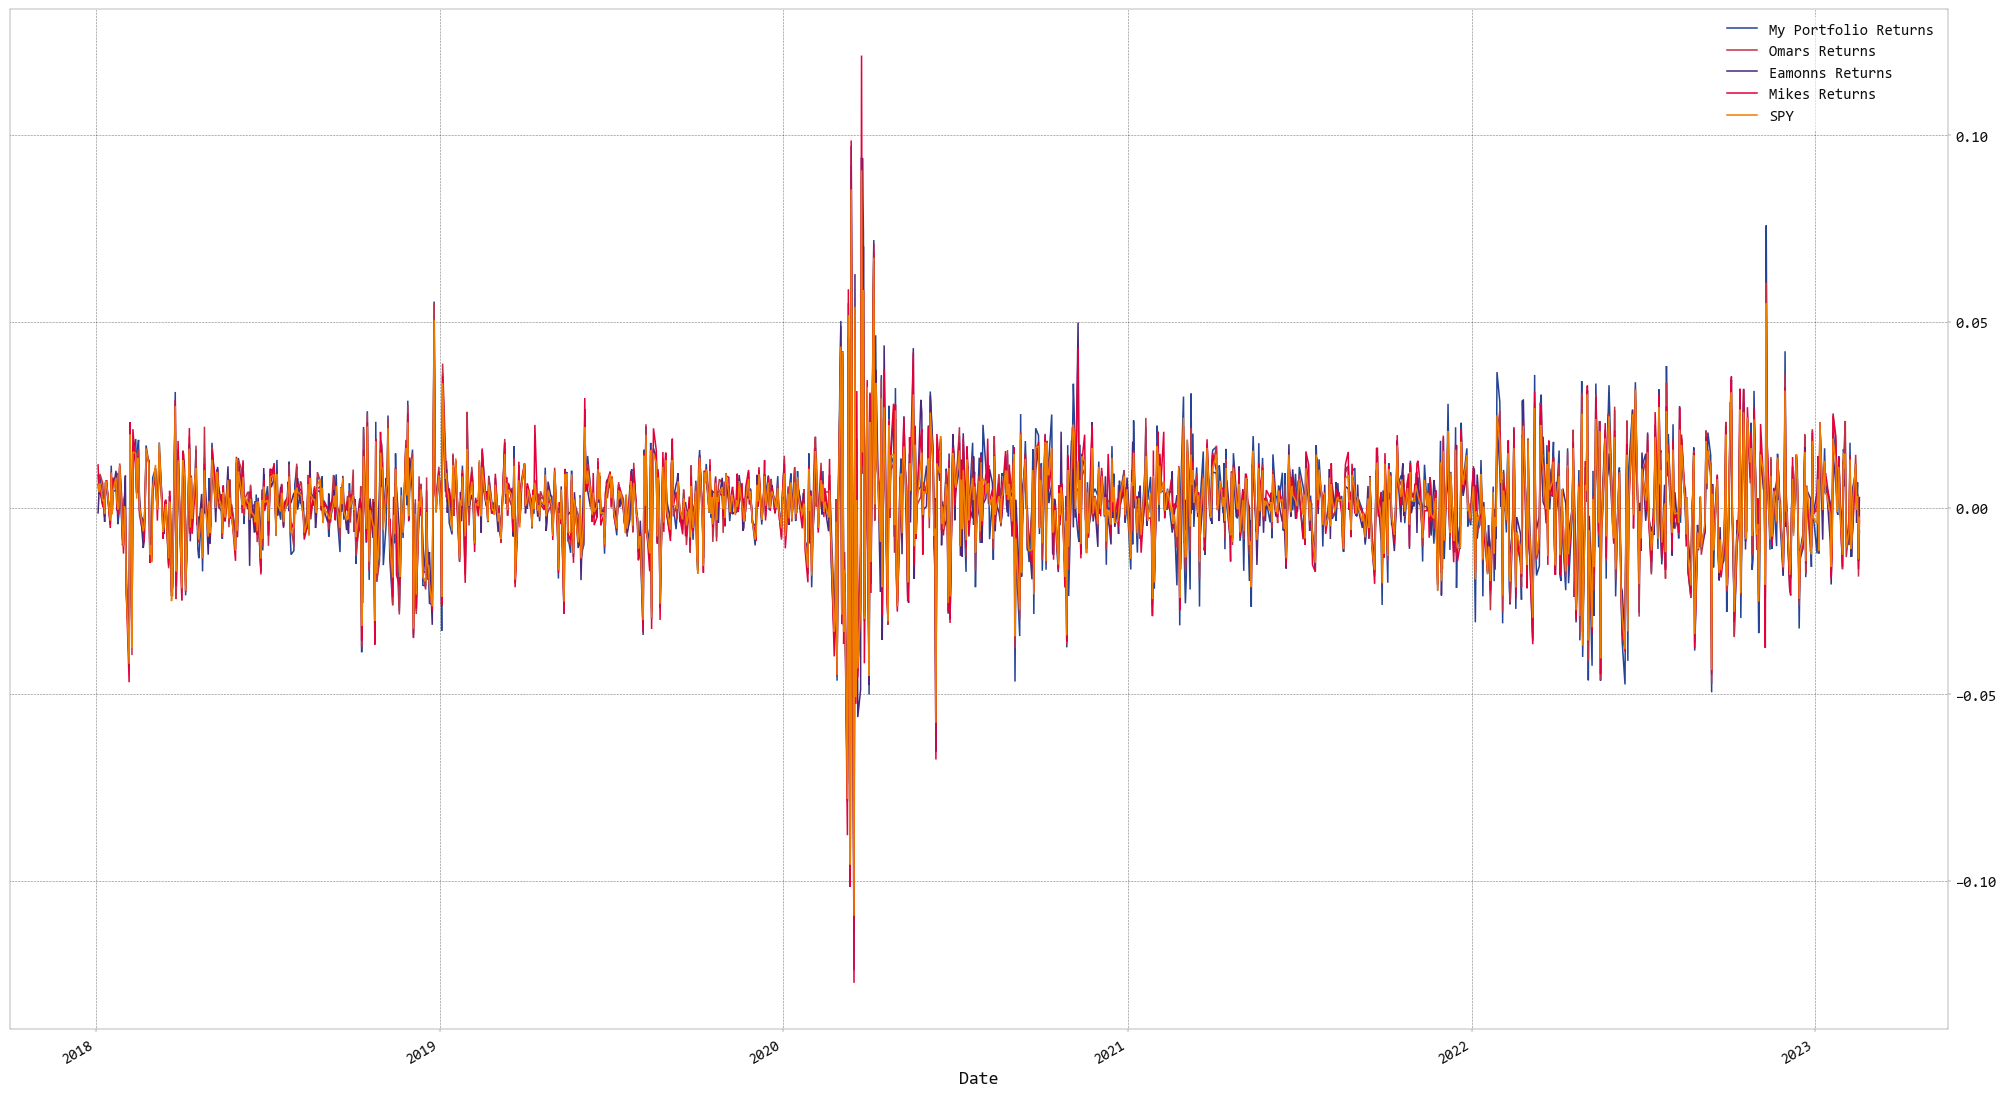

In [60]:
combined_df.plot(figsize=(25,15),

).autoscale()

In [76]:
portfolio_std = pd.DataFrame(combined_df.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,0.015556
Omars Returns,0.013834
Eamonns Returns,0.013084
Mikes Returns,0.014969
SPY,0.013498


In [31]:
# Lets Test Our Portfolios
initial_investment = 10000

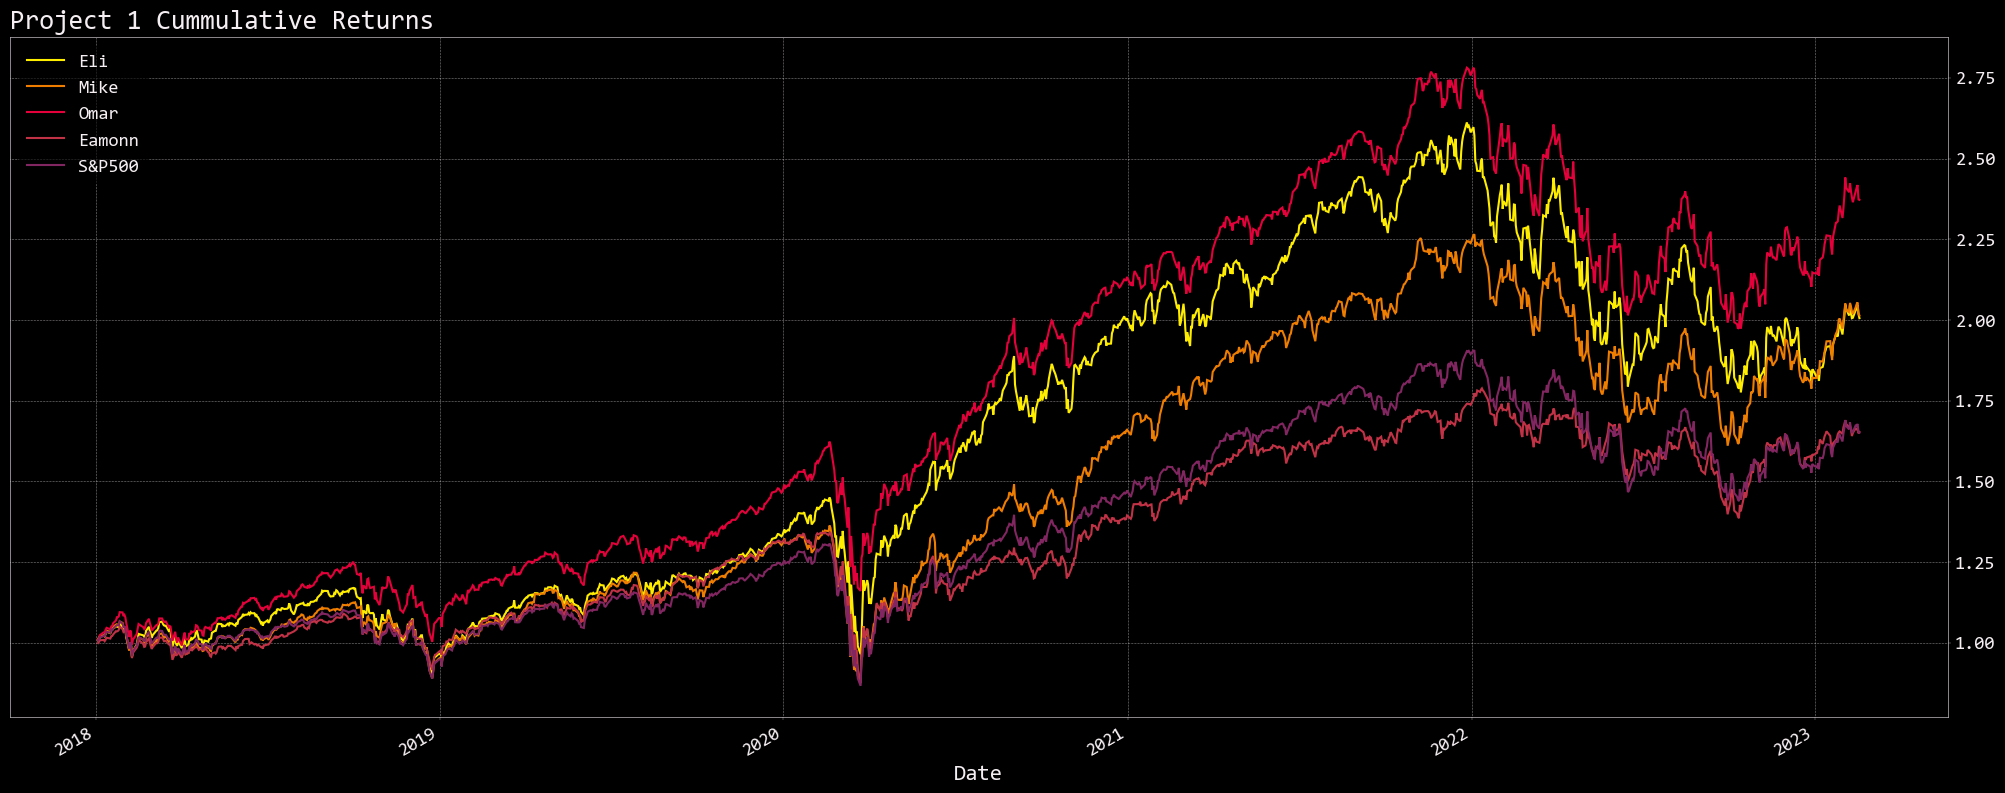

In [77]:
eli_cummulative_returns = (1 + my_portfolio_returns).cumprod()
mike_cummulative_returns = (1 + mike_portfolio_returns).cumprod()
omar_cummulative_returns = (1 + omar_portfolio_returns).cumprod()
eamonn_cummulative_returns = (1 + eamonn_portfolio_returns).cumprod()
sap_cummulative_returns = (1 + sap_daily_returns).cumprod()

ax = eli_cummulative_returns.plot(title = "Project 1 Cummulative Returns", figsize = (25,10))
mike_cummulative_returns.plot(ax=ax)
omar_cummulative_returns.plot(ax=ax)
eamonn_cummulative_returns.plot(ax=ax)
sap_cummulative_returns.plot(ax=ax)
ax.legend(["Eli","Mike","Omar","Eamonn","S&P500"])

In [51]:
# omar_cummulative_returns = (1 + omar_portfolio_returns).cumprod()
# (initial_investment * cummulative_returns).plot(
#     title = "Omar",
#     figsize = (15, 10)
# )

In [52]:
# eamonn_cummulative_returns = (1 + eamonn_portfolio_returns).cumprod()
# (initial_investment * cummulative_returns).plot(
#     title = "Eamonn",
#     figsize = (15, 10)
# )

In [53]:
# mike_cummulative_returns = (1 + mike_portfolio_returns).cumprod()
# (initial_investment * mike_cummulative_returns).plot(
#     title = "Mike",
#     figsize = (15, 10)
# )

In [36]:
stocks = openbb.stocks.disc.asc()
stocks.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BTCM,BIT Mining Limited,3.2500,-0.2400,-6.88%,143551,699139,34.574M,
1,SKLZ,Skillz Inc.,0.6748,-0.0634,-8.59%,7.233M,9.594M,283.62M,
2,TLRY,"Tilray Brands, Inc.",2.7800,-0.2300,-7.64%,15.76M,19.225M,1.711B,6.62
3,UP,Wheels Up Experience Inc.,1.1000,-0.0300,-2.65%,1.131M,1.605M,272.253M,
4,SDC,"SmileDirectClub, Inc.",0.5301,-0.0599,-10.15%,1.959M,2.806M,205.737M,


In [42]:
openbb.stocks.fa.analysis('VUG')

""
